In [1]:
## hier werden die Hauptfunktionen aufgerufen

In [2]:
# Vorschlag für Reihenfolge:
# - main for parameters
# - rk4 (and comparison to euler)
# - example_heat (optional): simple example using rk4 and a model for the heat equation
# - awareness: awareness-SIR model and related functions
# - analysis - old and new research questions
# - plots


# Information Travel and Epidemics
## Introduction
Information spread changes the behaviour of a population in a pandemic significantly. In this analysis, we want to study the effect of information spread on containing an epidemic spread. Our work is based on [Funk et al. 2009](https://www.pnas.org/doi/full/10.1073/pnas.0810762106). The paper's conclusion is that high quality information can change the human behaviour. To replicate their results, we extend a well-know SIR-Model with an awarness component. We created our own model based on following hypothesis: 

1. “Which conditions can lead to outbreaks being contained by the information spread?” 

2. “What is the impact of self-isolation of knowingly infected individuals on the spread of a disease and under which conditions is it most impactful?”


Our goal was to investigate the influence of information on epidemic spreading. Based on the study of Funk et al, we assume that information quality decreases after a certain time and number of individuals passing information on (grapevine effect). We extended the original model with further aspects like the isolation rate. We would like to investigate how the infection changes after an individual is infected and isolates under what circumstances the isolation would be particularly successful. 

This is how our program is structured: 
The core files are <b> main.ipynb</b>, <b>awareness.ipynb</b>, <b>simulation.ipynb</b> and <b>plot.ipynb</b>. The file <b>rk4.ipynb</b> includes the numerical approach to solve partial differential equations. The folder <b>data</b> stores the results of the executed computations. They provide the results used in the model's diagrams. The <b>figures</b>-folder holds the final diagrams.

## Our team

* <b>Lisa Beckmann</b>, Georg August University of Göttingen, Physics MSc.
* <b>Melanie Eckenfels</b>, Karlsruhe Institute of Technology, European Culture and History of Ideas MA.
* <b>Nathanael Gutknecht</b>, Karlsruhe Institute of Technology, Physics MSc.
* <b>Zuzanna Mielczarek</b>, University of Lübeck, Media Informatics MA.


## The model
We chose a basic SIR-model to model the spread of the epidemic. The rate for susceptibility to infection is modified by the decay constant $\rho$ and the parameter $i$ which describes the quality of information with $(1-\rho ^i)$.

Information quality is characterized by the number of times it was passed on until arriving at individual $X$.
Thus, the lower $i$ is, the better the information quality and the less susceptible an individual is, Information is generated by infected indivduals who also can notice their own infection with a rate $\omega$. Information transmission can be achieved by ... with a rate of $\alpha$, but the information quality wanes by $i+1$ for the receiving individual. Waning of information quality by time is modeled by ... with a rate of $\lambda$.

(Attach picture of our models?)

To simplify the model and to match the individual-based analysis described by [Funk et al. 2009](https://www.pnas.org/doi/full/10.1073/pnas.0810762106), we chose to model the population on a 2D-grid with each point having four neighbours. 

## Main File

In this file all the main functions are called to show the results of our work. For this purpose, the following python-libraries: <b> numpy</b>, <b>matplotlib</b>, <b>import_ipynb</b>, <b>typing</b>, <b>collections</b> and <b> functools</b>  must be included. Among them are self implemented files like <b>rk4</b> and <b>analysis</b> with the needed functions. 

At the beginning of the file all needed parameters are being declared and provided with default values. They are splittet in: <b>model</b> parameters and <b>simulation</b> parameters. Parameters for the infection, awareness and the sensitivity analysis can be varierd in the model.
The final output of the main functions (plots) of this project are displayed at the end of this file. 
Among them are .... (SCHREIBEN WENN FERTIG)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

In [4]:
from typing import Union
from collections.abc import Callable
from functools import partial

In [5]:
from rk4 import rk4
from analysis import run_sensitivity_sweep, run_information_simulation, run_simulation
from plots import plot_evolution, plot_awareness_compartments, plot_reconstruct_awareness, plot_sweep

importing Jupyter notebook from rk4.ipynb
importing Jupyter notebook from analysis.ipynb
importing Jupyter notebook from awareness.ipynb
importing Jupyter notebook from plots.ipynb


In [6]:
# heat.ipynb: using runge-kutta-4 to solve the heat equation on a grid (as a proof of concept)
# approach for desease and information spread: similar structure, but more complicated function 

In [7]:
# model parameters

# infections
beta0  = 0.03  # virus transmission rate between two individuals
gamma0 = 0.03  # recovery rate

infection_params = [beta0, gamma0]

# awareness
alpha0 = 0.06  # awareness transmission
omega0 = 0.06  # awareness creation
lam0   = 0.05  # awareness fading over time
rho0   = 0.6   # susceptibility reduction (rh0=0.9 means 90% reduction for first level, 81% reduction for second level etc.)
kappa0 = 0.7   # self isolation (kappa=0.8 means 80% reduction through isolation)

awareness_params = [alpha0, omega0, lam0, rho0, kappa0]
awareness_params_no_awareness = [0, 0, 0, 0, 0]

# variation for sensitivity analysis
k = 8
kk = 8
alpha = np.geomspace(0.5, 2, k)*alpha0
omega = np.geomspace(0.5, 2, k)*omega0
lam = np.geomspace(0.5, 2, k)*lam0
rho = np.linspace(0.1, 0.9, kk)
kappa = np.linspace(0.1, 0.9, kk)

awareness_params_variation = [alpha, omega, lam, rho, kappa]



In [8]:
# simulation parameters

grid_size = 30  # length of square grid
info_compartments = 10  # number of information compartments, the first one is complete reduction of
# susceptibility for the known sick ones, the last one is for no awareness at all
tmax = 1000  # simulation time
dt = 1  # time step

simulation_params = [grid_size, info_compartments, tmax, dt]

In [9]:
run_simulation(infection_params, awareness_params, simulation_params, name='default')
run_simulation(infection_params, awareness_params_no_awareness, simulation_params, name='no_awareness')

{'alpha': 0.06, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
{'alpha': 0, 'omega': 0, 'lam': 0, 'rho': 0, 'kappa': 0}


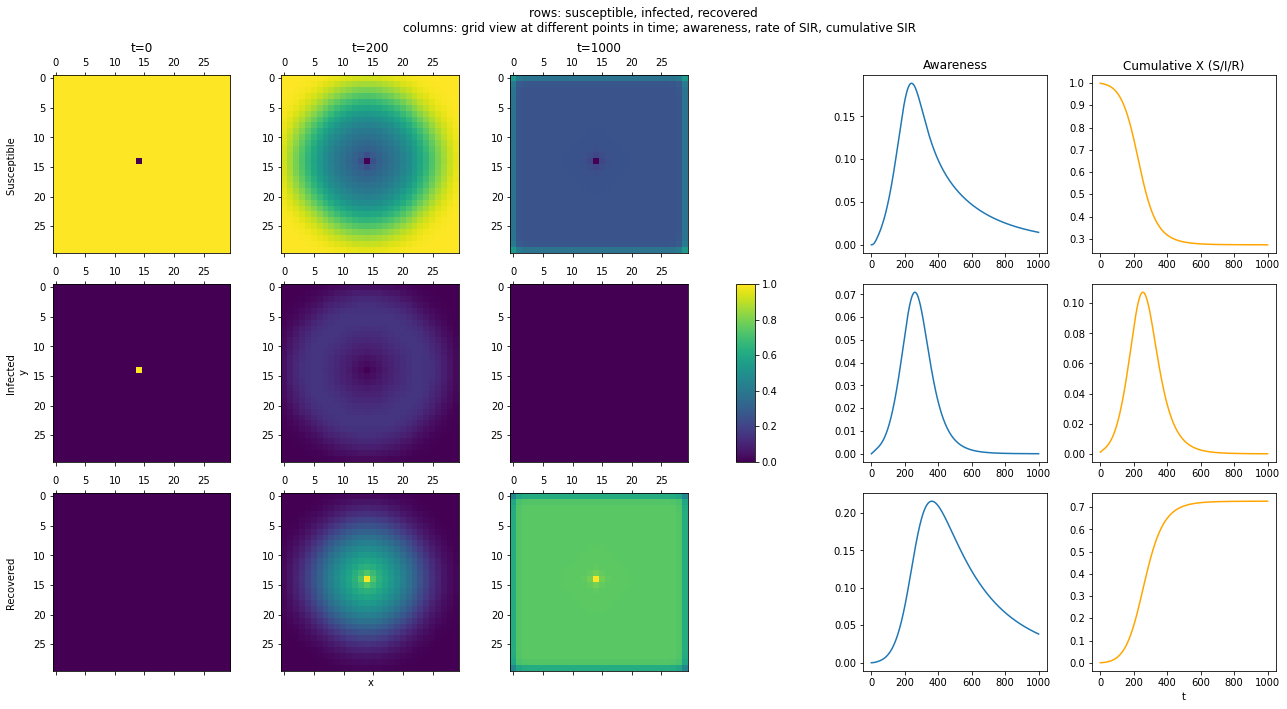

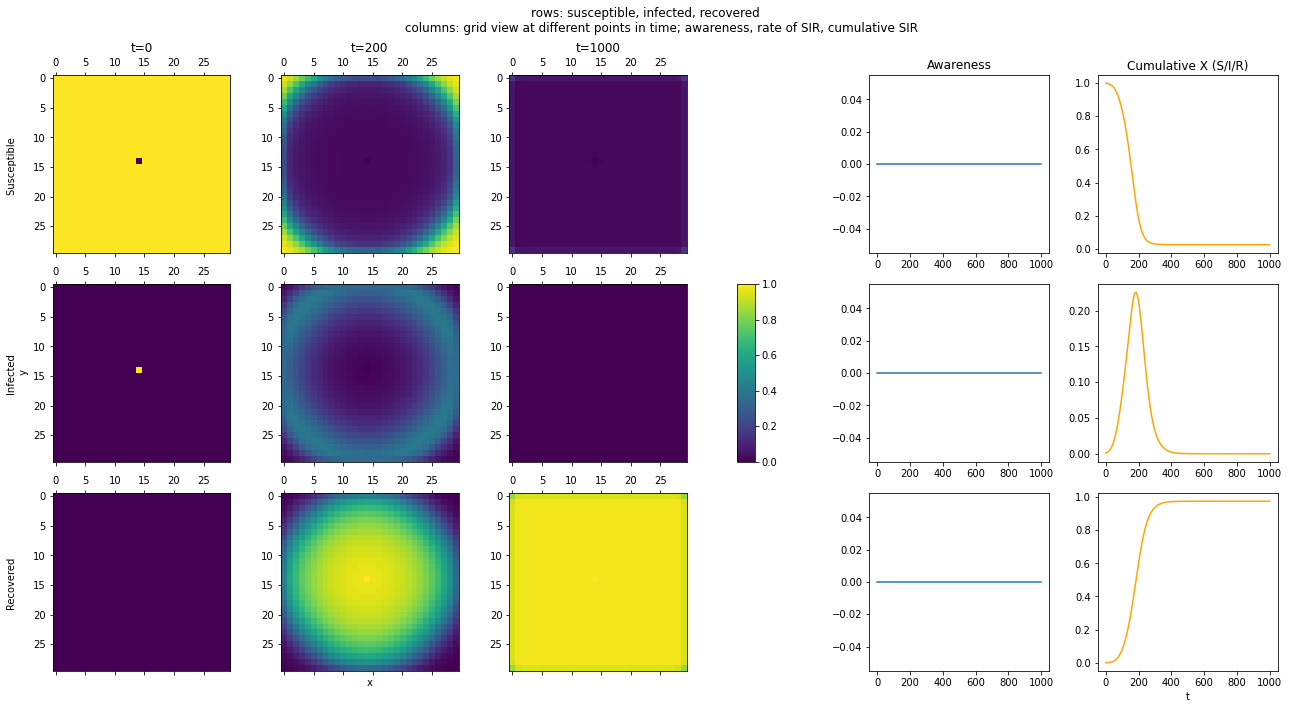

In [10]:
plot_evolution(awareness_params, name='default', tm=200)
plot_evolution(awareness_params_no_awareness, name='no_awareness', tm=200)

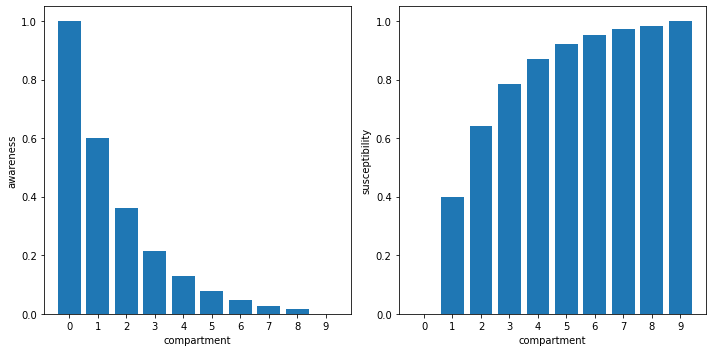

In [11]:
plot_awareness_compartments(awareness_params, simulation_params)

In [12]:
run_information_simulation(infection_params, awareness_params, simulation_params)

{'alpha': 0.06, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}


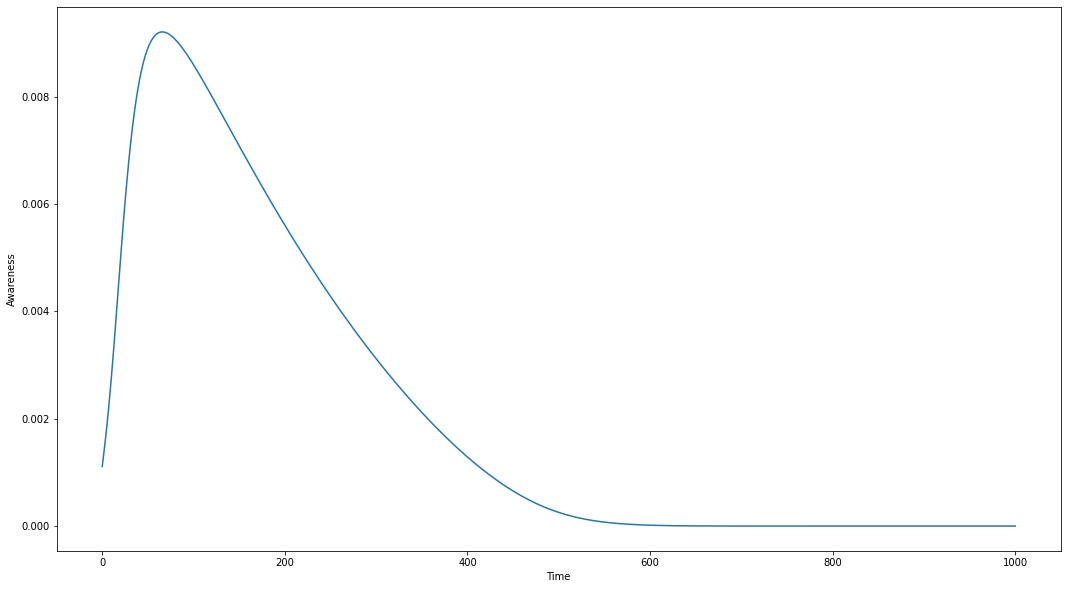

In [13]:
plot_reconstruct_awareness()

In [14]:
interrupt = False
assert not interrupt

In [15]:
run_sensitivity_sweep(infection_params, awareness_params, awareness_params_variation, simulation_params)

1/41:   {'alpha': 0.06, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
2/41:   {'alpha': 0.03, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
3/41:   {'alpha': 0.03657040962613426, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
4/41:   {'alpha': 0.04457982867410845, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
5/41:   {'alpha': 0.05434341985583439, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
6/41:   {'alpha': 0.06624537082042874, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
7/41:   {'alpha': 0.08075401155794136, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
8/41:   {'alpha': 0.09844024272091653, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
9/41:   {'alpha': 0.12, 'omega': 0.06, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
10/41:   {'alpha': 0.06, 'omega': 0.03, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
11/41:   {'alpha': 0.06, 'omega': 0.03657040962613426, 'lam': 0.05, 'rho': 0.6, 'kappa': 0.7}
12/41:   {'alpha': 0.06, 'omega': 0

alpha [0.03, 0.03657040962613426, 0.04457982867410845, 0.05434341985583439, 0.06624537082042874, 0.08075401155794136, 0.09844024272091653, 0.12] [0.1325608058806156, 0.12566085759084855, 0.11837728802430043, 0.11096002219155446, 0.1036325589125874, 0.09655163553526554, 0.08981838568052439, 0.0834866876716378]
omega [0.03, 0.03657040962613426, 0.04457982867410845, 0.05434341985583439, 0.06624537082042874, 0.08075401155794136, 0.09844024272091653, 0.12] [0.14739837349608043, 0.13704516090893828, 0.12572851335886237, 0.11358497720533159, 0.1008511177468836, 0.08786100306680635, 0.07502173768421393, 0.06276281712140008]
lam [0.025, 0.030475341355111887, 0.03714985722842371, 0.04528618321319533, 0.055204475683690614, 0.06729500963161782, 0.08203353560076379, 0.1] [0.07190431444080049, 0.08103741734435599, 0.09104218398588088, 0.1017368792435589, 0.11289333297962967, 0.12424824113895562, 0.13553635326740618, 0.1464926555971383]
rho [0.1, 0.2142857142857143, 0.3285714285714286, 0.442857142857

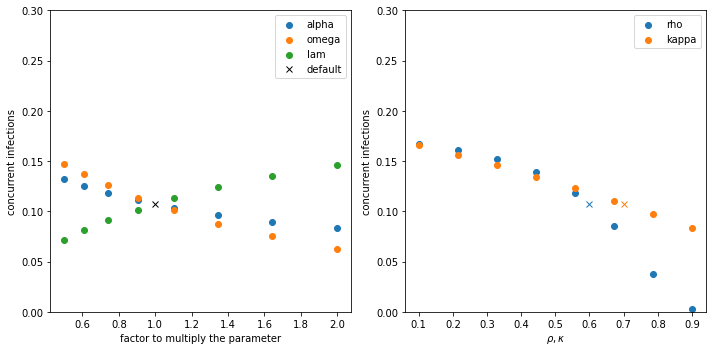

In [16]:
plot_sweep()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac0f8ce2-3132-47be-a4d1-6216636e93ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>